In [1]:
# importovanje biblioteka koje ce nam biti potrebne kasnije
import numpy as np
import pandas as pd 
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn import model_selection

In [2]:
#Ucitavanje fajla sa podacima za trening
data_1 = pd.read_csv('D:\\Vlada\\Milica master\\all_variables.csv',index_col='SK_ID_CURR')
X_1 = data_1.drop('TARGET', axis = 1)
y_1 = data_1['TARGET']
#podela na trening i test skup
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42, stratify = y_1)
print('Dimenzije trening skupa: ', X_train_1.shape)
X_train_1.head()

Dimenzije trening skupa:  (246008, 1542)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,client_installments_AMT_PAYMENT_min_count,client_installments_AMT_PAYMENT_min_mean,client_installments_AMT_PAYMENT_min_max,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_PAYMENT_sum_count,client_installments_AMT_PAYMENT_sum_mean,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_PAYMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
310536,Cash loans,F,N,N,2,90000.0,227520.0,13189.5,180000.0,Unaccompanied,...,57.0,3846.4800,10338.120,75.555,219249.360,57.0,160426.550,223200.000,32691.105,9144313.00
365516,Cash loans,M,Y,Y,0,90000.0,161730.0,13095.0,135000.0,Unaccompanied,...,27.0,9602.7900,13984.650,3826.665,259275.330,27.0,84089.430,153913.500,22835.790,2270414.80
242055,Cash loans,M,N,Y,0,135000.0,728847.0,26307.0,553500.0,"Spouse, partner",...,4.0,12985.4700,12985.470,12985.470,51941.880,4.0,51958.484,51958.484,51958.484,207833.94
454894,Cash loans,M,N,N,0,135000.0,474183.0,34636.5,391500.0,Unaccompanied,...,82.0,7269.0425,13692.825,4764.825,596061.500,82.0,759773.440,1170179.200,28595.521,62301424.00
448321,Cash loans,F,N,Y,0,180000.0,254700.0,27558.0,225000.0,Unaccompanied,...,11.0,3102.6150,3102.615,3102.615,34128.766,11.0,37066.230,37066.230,37066.230,407728.53


In [3]:
data_2 = pd.read_csv('D:\\Vlada\\Milica master\\german_credit_data.csv')

In [4]:
data_2.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good


In [5]:
di = {"good": 0, "bad": 1}
data_2.replace({"Risk": di}, inplace=True)

data_2.rename(columns ={"Risk": "TARGET"}, inplace = True)
data_2.rename(columns ={"Unnamed: 0": "ID"}, inplace = True)

In [6]:
data_2.head(3)

,ID,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,TARGET
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0


In [7]:
X_2 = data_2.drop('TARGET', axis = 1)
y_2 = data_2['TARGET']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42, stratify = y_2)
print('Dimenzije trening skupa: ', X_train_2.shape)
X_train_2.head()

Dimenzije trening skupa:  (800, 10)


,ID,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
828,828,47,male,2,free,NaN,little,8335,36,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
148,148,28,male,2,own,little,little,5371,36,furniture/equipment
735,735,29,female,0,own,NaN,moderate,3990,36,domestic appliances
130,130,24,female,2,own,NaN,moderate,8487,48,car


In [8]:
X_train_2.to_csv('D:\\Vlada\\Milica master\\X_train_2_new.csv',index=False,chunksize = 500)

Vidimo da se trening set sastoji od 800 redova i 25 kolona. Redovi predstavljaju zahteve za kredit, dok se u kolonama nalaze varijable. 

In [9]:
print('Dimenzije test skupa: ', X_test_1.shape)
X_test_1.head()
print('Dimenzije test skupa: ', X_test_2.shape)
X_test_2.head()

Dimenzije test skupa:  (61503, 1542)
Dimenzije test skupa:  (200, 10)


,ID,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
30,30,36,male,2,own,rich,moderate,1913,18,business
128,128,34,male,3,own,little,moderate,1860,12,car
289,289,48,male,2,own,little,little,1024,24,radio/TV
216,216,31,male,2,own,little,little,3104,18,business
966,966,23,male,1,own,quite rich,moderate,2520,27,radio/TV


U test skupu imamo ukupno 61503 opservacija za prvi dataset i 200 za drugi dataset.

## Pretprocesiranje

U ovom delu cemo pokusati da pomocu vizuelizacija i racunanja razlicitih deskriptivnih statistika razumemo skup sa kojim radimo i ispitamo veze izmedju varijabli i targeta. Target varijabla je 1 ukoliko je klijent difoltirao i 0 ako nije. Za pocetak mozemo da izbrojimo klijente koji su difoltirali i da izracunamo udeo takvih klijenata.

In [10]:
y_train_1.value_counts(normalize=True)*100

0    91.927092
1     8.072908
Name: TARGET, dtype: float64

In [11]:
y_train_2.value_counts(normalize=True)*100

0    70.0
1    30.0
Name: TARGET, dtype: float64

In [12]:
def plot_absolute_relative_frequency(variable):
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    absolute_frequency.plot.bar(color = 'blue', ax=ax1)
    relative_frequency.plot.bar(color = 'yellow', ax=ax2)
    ax1.set_title(f'Apsolutna frekvencija ciljne promenljive')
    ax2.set_title(f'Relativna frekvencija ciljne promenljive')
    ax1.set_xticklabels(absolute_frequency.index, rotation = 'horizontal')
    ax2.set_xticklabels(relative_frequency.index, rotation = 'horizontal')
    
    for idx, value in enumerate(absolute_frequency):
        ax1.text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
        # Prve dve koordinate su pozicija na grafiku, a treca je vrednost.
    for idx, value in enumerate(relative_frequency):
        ax2.text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')

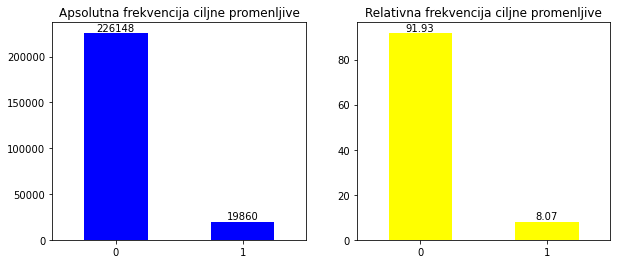

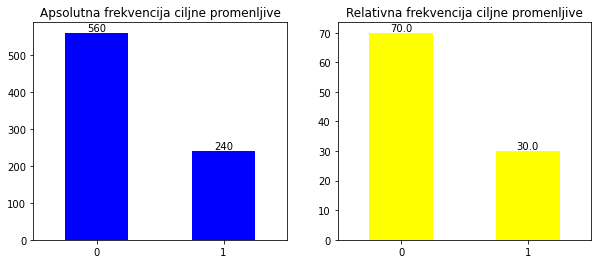

In [13]:
plot_absolute_relative_frequency(y_train_1)
plot_absolute_relative_frequency(y_train_2)

Imamo 92% dobrih klijenata i 8% losih klijenata. Iz ovoga mozemo zakljuciti da radimo sa nebalansiranim skupom podataka.

Vizuelno to izgleda ovako.

In [14]:
#Funkcija koja racuna procent missing podataka.
def missing_values_table(df):
        #Ukupno missing vrednost
        mis_val = df.isnull().sum()
        
        #Procenat
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Tabela sa rezultatima
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #Primenovacemo kolone
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #Sortiramo tabelu opadajuce po broju missing podataka
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        #Ispisujemo rezultate
        print ("Tabela ima " + str(df.shape[1]) + " kolona.\n"      
            "Od toga " + str(mis_val_table_ren_columns.shape[0]) +
              " kolona ima missing vrednosti.")
        
        #Tabela sa rezultatima
        return mis_val_table_ren_columns

In [15]:
#Podaci o nedostajucim vrednostima
missing_values_1 = missing_values_table(X_train_1)
missing_values_1.head(50)

Tabela ima 1542 kolona.
Od toga 1489 kolona ima missing vrednosti.


,Missing Values,% of Total Values
previous_RATE_INTEREST_PRIMARY_max,242323,98.5
previous_RATE_INTEREST_PRIMARY_mean,242323,98.5
previous_RATE_INTEREST_PRIVILEGED_min,242323,98.5
previous_RATE_INTEREST_PRIVILEGED_max,242323,98.5
previous_RATE_INTEREST_PRIVILEGED_mean,242323,98.5
previous_RATE_INTEREST_PRIMARY_min,242323,98.5
client_credit_AMT_PAYMENT_CURRENT_max_min,197059,80.1
client_credit_AMT_PAYMENT_CURRENT_max_max,197059,80.1
client_credit_AMT_PAYMENT_CURRENT_max_mean,197059,80.1
client_credit_AMT_PAYMENT_CURRENT_mean_min,197059,80.1


In [16]:
#Podaci o nedostajucim vrednostima
missing_values_2 = missing_values_table(X_train_2)
missing_values_2.head(50)

Tabela ima 10 kolona.
Od toga 2 kolona ima missing vrednosti.


,Missing Values,% of Total Values
Checking account,316,39.5
Saving accounts,144,18.0


In [17]:
cols_1 = [x for x in X_train_1.columns if ('bureau' in x or 'client' in x  or 'previous' in x)]

In [18]:
cols_2 = [x for x in X_train_2.columns if ('bureau' in x or 'client' in x  or 'previous' in x)]

Zbog nacina prikupljanja podataka, znamo da ukoliko nam fali podatak o klijentovom kreditnom birou ili o prethodnim apliciranjima, to je zato sto klijent zaista nije imao prethodnu kreditnu istoriju. U ovom slucaju govorimo o informativnim nedostajucim vrednostima, te je opravdano zameniti N/A sa nulom.

In [19]:
cols_1

['bureau_DAYS_CREDIT_count',
 'bureau_DAYS_CREDIT_mean',
 'bureau_DAYS_CREDIT_max',
 'bureau_DAYS_CREDIT_min',
 'bureau_DAYS_CREDIT_sum',
 'bureau_CREDIT_DAY_OVERDUE_count',
 'bureau_CREDIT_DAY_OVERDUE_mean',
 'bureau_CREDIT_DAY_OVERDUE_max',
 'bureau_CREDIT_DAY_OVERDUE_min',
 'bureau_CREDIT_DAY_OVERDUE_sum',
 'bureau_DAYS_CREDIT_ENDDATE_count',
 'bureau_DAYS_CREDIT_ENDDATE_mean',
 'bureau_DAYS_CREDIT_ENDDATE_max',
 'bureau_DAYS_CREDIT_ENDDATE_min',
 'bureau_DAYS_CREDIT_ENDDATE_sum',
 'bureau_DAYS_ENDDATE_FACT_count',
 'bureau_DAYS_ENDDATE_FACT_mean',
 'bureau_DAYS_ENDDATE_FACT_max',
 'bureau_DAYS_ENDDATE_FACT_min',
 'bureau_DAYS_ENDDATE_FACT_sum',
 'bureau_AMT_CREDIT_MAX_OVERDUE_count',
 'bureau_AMT_CREDIT_MAX_OVERDUE_mean',
 'bureau_AMT_CREDIT_MAX_OVERDUE_max',
 'bureau_AMT_CREDIT_MAX_OVERDUE_min',
 'bureau_AMT_CREDIT_MAX_OVERDUE_sum',
 'bureau_CNT_CREDIT_PROLONG_count',
 'bureau_CNT_CREDIT_PROLONG_mean',
 'bureau_CNT_CREDIT_PROLONG_max',
 'bureau_CNT_CREDIT_PROLONG_min',
 'bureau_CN

In [20]:
X_train_1[cols_1] = X_train_1[cols_1].replace(np.nan, 0)
X_test_1[cols_1] = X_test_1[cols_1].replace(np.nan, 0)

In [21]:
X_train_2[cols_2] = X_train_2[cols_2].replace(np.nan, 0)
X_test_2[cols_2] = X_test_2[cols_2].replace(np.nan, 0)

In [22]:
missing_values_1 = missing_values_table(X_train_1)
missing_values_1.head(50)

Tabela ima 1542 kolona.
Od toga 67 kolona ima missing vrednosti.


,Missing Values,% of Total Values
COMMONAREA_MEDI,171811,69.8
COMMONAREA_AVG,171811,69.8
COMMONAREA_MODE,171811,69.8
NONLIVINGAPARTMENTS_MEDI,170729,69.4
NONLIVINGAPARTMENTS_MODE,170729,69.4
NONLIVINGAPARTMENTS_AVG,170729,69.4
FONDKAPREMONT_MODE,168215,68.4
LIVINGAPARTMENTS_MODE,168119,68.3
LIVINGAPARTMENTS_MEDI,168119,68.3
LIVINGAPARTMENTS_AVG,168119,68.3


Ispitacemo nekoliko varijabli. Pocecemo od varijable days_birth, ona sadrzi sve negativne vrednosti, da bismo dobili starost klijenta podelicemo sa -365 kako bismo dobili intuitivnije vrednosti.

In [23]:
(X_train_1['DAYS_BIRTH'] / -365).describe()

count    246008.000000
mean         43.916482
std          11.953066
min          20.517808
25%          33.975342
50%          43.134247
75%          53.898630
max          69.120548
Name: DAYS_BIRTH, dtype: float64

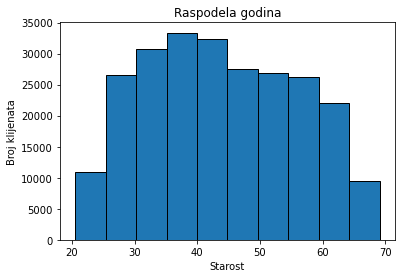

In [24]:
#Predstavicemo raspodelu starosti klijenta koristeci histogram
plt.hist(X_train_1['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 10)
plt.title('Raspodela godina'); plt.xlabel('Starost'); plt.ylabel('Broj klijenata');

Sa prethodnog grafika vidimo da nemamo autlajere i raspodela je u skladu sa nasim ocekivanjima. Sledece sto zelimo da utvrdimo je da li postoji razlika u raspodeli godina kod dobrih i losih klijenata. 

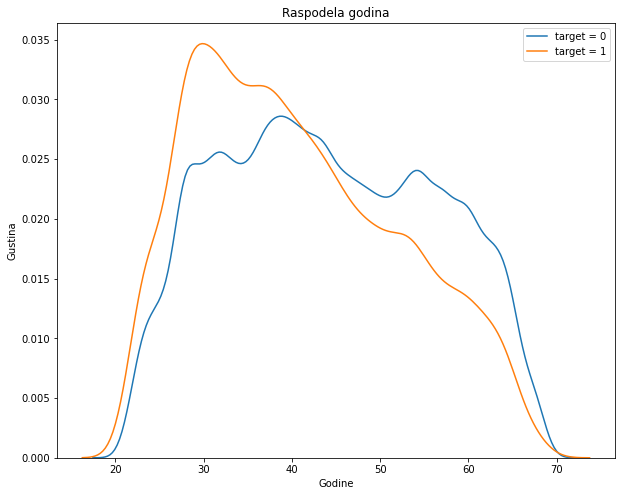

In [25]:
plt.figure(figsize = (10, 8))

#Raspodela klijenata koji nisu difoltirali
sns.kdeplot(X_train_1.loc[y_train_1 == 0, 'DAYS_BIRTH'] / -365, label = 'target = 0')

#Raspodela klijenata koji su difoltirali
sns.kdeplot(X_train_1.loc[y_train_1 == 1, 'DAYS_BIRTH'] / -365, label = 'target = 1')

plt.xlabel('Godine'); plt.ylabel('Gustina'); plt.title('Raspodela godina');plt.legend();

Primecujemo da su losi klijenti nagnuti ulevo, te mozemo zakljuciti da klijenti starosti oko 30 godina predstavljaju najrizicniju kategoriju. Ukoliko se crvena i plava linija ne bi znacajno razlikovale, varijabla bi najverovatnije imala vrlo slabu prediktivno moc. To ovde nije slucaj i ocekujemo da ce i kasnije analize pokazati da je starost klijenta znacajna za model. 

Ispitajmo jos jednu varijablu DAYS_EMPLOYED koja predstavlja broj dana staza i vrednosti su ponovo negativne. 

In [26]:
(X_train_1['DAYS_EMPLOYED'] / 365).describe()

count    246008.000000
mean        174.194969
std         386.525197
min         -49.073973
25%          -7.567123
50%          -3.328767
75%          -0.797260
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

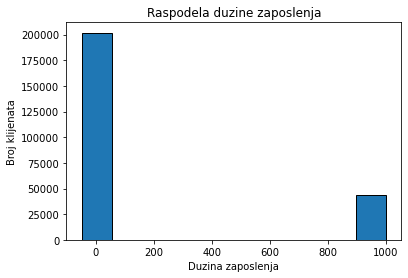

In [27]:
#Predstavicemo raspodelu starosti klijenta koristeci histogram
plt.hist(X_train_1['DAYS_EMPLOYED'] / 365, edgecolor = 'k', bins = 10)
plt.title('Raspodela duzine zaposlenja'); plt.xlabel('Duzina zaposlenja'); plt.ylabel('Broj klijenata');

Kod ove varijable imamo problem sa netacnim podacima i zbog toga ne mozemo da steknemo uvid u stvarnu raspodelu varijable. Pokusacemo da izbacimo vrednosti koje su netacne pa da zatim ponovimo analizu. Objasnjenje za veliki broj klijenata kod kojih je duzina zaposlenja 1000 godina moze biti da penzionere duzina zaposlenja vise nije relevantna informacija, iako sam podatak postoji. Internim procesom u banci se moze regulisati da se za svakog penzionera unese broj dana ekvivalentan 1000 godina zaposlenja, na taj nacin se ova grupa izdvaja od klijenata koji su i dalje u radnom odnosu. 

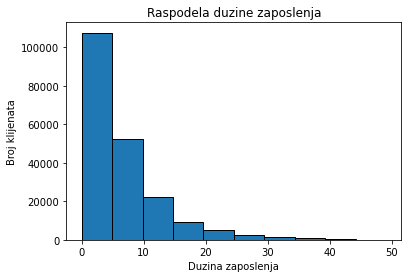

In [28]:
# kreiracemo kolonu koja oznacava da li je opservacija netacna
train_without_anom = X_train_1[X_train_1["DAYS_EMPLOYED"] != 365243]

# Pogresnu vrednost zamenicemo sa na
#app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
plt.hist(train_without_anom['DAYS_EMPLOYED'] / -365, edgecolor = 'k', bins = 10)
plt.title('Raspodela duzine zaposlenja'); plt.xlabel('Duzina zaposlenja'); plt.ylabel('Broj klijenata');

Sada dobijamo smislenu raspodelu.

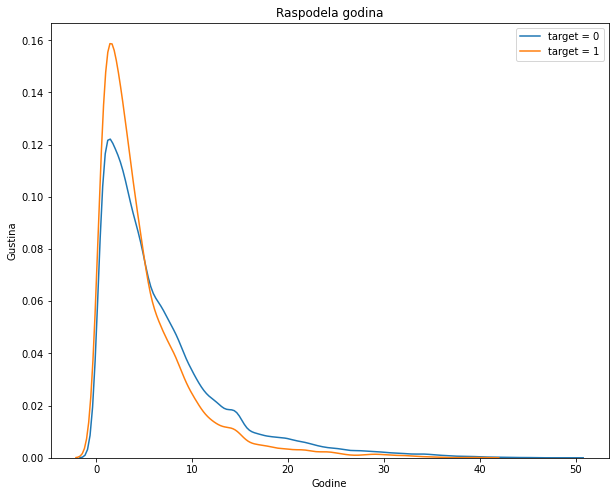

In [29]:
plt.figure(figsize = (10, 8))

#Raspodela klijenata koji nisu difoltirali
sns.kdeplot(train_without_anom.loc[y_train_1 == 0, 'DAYS_EMPLOYED'] / -365, label = 'target = 0')

#Raspodela klijenata koji su difoltirali
sns.kdeplot(train_without_anom.loc[y_train_1 == 1, 'DAYS_EMPLOYED'] / -365, label = 'target = 1')

plt.xlabel('Godine'); plt.ylabel('Gustina'); plt.title('Raspodela godina');plt.legend();

Ponovo primecujemo razliku izmedju crvene i plave linije, medjutim, kako smo vec zakljucili da su mladji klijenti rizicniji, ocekivano je da mladji klijenti imaju i kraci radni staz. Ove dve varijable nam zapravo daju vrlo slicnu informaciju. U nastavku je potrebno izracunati korelaciju izmedju starosti i duzine zaposlenja i ukoliko se zaista ispostavi ono sto naslucujemo da postoji visoka korelacija, zadrzacemo onu varijablu koja ima vecu prediktivnu moc.

## SMOTE

Primer kako radi SMOTE, generisemo nasumicne podatke.

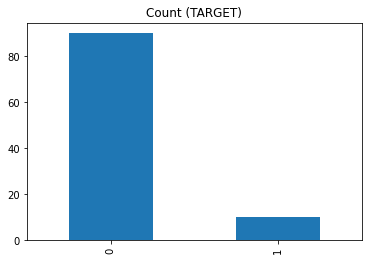

In [30]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['TARGET'] = y
df.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

In [31]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

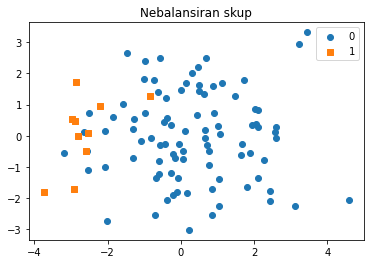

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Nebalansiran skup')

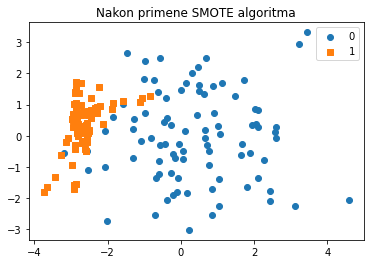

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'Nakon primene SMOTE algoritma')

Da bismo mogli da primenimo SMOTE algoritam, neophodno je da prvo popunimo sve praznine u podacima. Za pocetak cemo izbaciti sve kolone koje imaju manje od 50% podataka. 

In [34]:
X_train_1.dropna(thresh = X_train_1.shape[0]*0.5, how = 'all', axis = 1, inplace = True)
print(X_train_1.shape)
X_test_1 = X_test_1[X_train_1.columns]

(246008, 1501)


In [35]:
X_train_2.dropna(thresh = X_train_2.shape[0]*0.5, how = 'all', axis = 1, inplace = True)
print(X_train_2.shape)
X_test_2 = X_test_2[X_train_2.columns]

(800, 10)


In [36]:
X_train_1.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,client_installments_AMT_PAYMENT_min_count,client_installments_AMT_PAYMENT_min_mean,client_installments_AMT_PAYMENT_min_max,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_PAYMENT_sum_count,client_installments_AMT_PAYMENT_sum_mean,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_PAYMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
310536,Cash loans,F,N,N,2,90000.0,227520.0,13189.5,180000.0,Unaccompanied,...,57.0,3846.4800,10338.120,75.555,219249.360,57.0,160426.550,223200.000,32691.105,9144313.00
365516,Cash loans,M,Y,Y,0,90000.0,161730.0,13095.0,135000.0,Unaccompanied,...,27.0,9602.7900,13984.650,3826.665,259275.330,27.0,84089.430,153913.500,22835.790,2270414.80
242055,Cash loans,M,N,Y,0,135000.0,728847.0,26307.0,553500.0,"Spouse, partner",...,4.0,12985.4700,12985.470,12985.470,51941.880,4.0,51958.484,51958.484,51958.484,207833.94
454894,Cash loans,M,N,N,0,135000.0,474183.0,34636.5,391500.0,Unaccompanied,...,82.0,7269.0425,13692.825,4764.825,596061.500,82.0,759773.440,1170179.200,28595.521,62301424.00
448321,Cash loans,F,N,Y,0,180000.0,254700.0,27558.0,225000.0,Unaccompanied,...,11.0,3102.6150,3102.615,3102.615,34128.766,11.0,37066.230,37066.230,37066.230,407728.53


In [37]:
X_train_2.head()

,ID,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
828,828,47,male,2,free,NaN,little,8335,36,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
148,148,28,male,2,own,little,little,5371,36,furniture/equipment
735,735,29,female,0,own,NaN,moderate,3990,36,domestic appliances
130,130,24,female,2,own,NaN,moderate,8487,48,car


In [38]:
missing_columns_1=X_train_1.columns[X_train_1.isnull().any()].tolist()
missing_columns_1

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [39]:
missing_columns_2=X_train_2.columns[X_train_2.isnull().any()].tolist()
missing_columns_2

['Saving accounts', 'Checking account']

In [40]:
categorical_list_1 = []
numerical_list_1 = []
for i in X_train_1.columns.tolist():
    if X_train_1[i].dtype=='object' or ('FLAG' in i and 'previous' not in i):
        categorical_list_1.append(i)
    else:
        numerical_list_1.append(i)
print('Number of categorical features:', str(len(categorical_list_1)))
print('Number of numerical features:', str(len(numerical_list_1)))

Number of categorical features: 39
Number of numerical features: 1462


In [41]:
categorical_list_1

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [42]:
X_train_1['previous_FLAG_LAST_APPL_PER_CONTRACT_N_count_norm']

SK_ID_CURR
310536    0.0
365516    0.0
242055    0.0
454894    0.0
448321    0.0
         ... 
136325    0.0
240509    0.0
387513    0.0
303331    0.0
430259    0.0
Name: previous_FLAG_LAST_APPL_PER_CONTRACT_N_count_norm, Length: 246008, dtype: float64

In [43]:
categorical_list_2 = []
numerical_list_2 = []
for i in X_train_2.columns.tolist():
    if X_train_2[i].dtype=='object':
        categorical_list_2.append(i)
    else:
        numerical_list_2.append(i)
print('Number of categorical features:', str(len(categorical_list_2)))
print('Number of numerical features:', str(len(numerical_list_2)))

Number of categorical features: 5
Number of numerical features: 5


In [44]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(X_train_1[numerical_list_1])
X_train_1[numerical_list_1] = imputer.transform(X_train_1[numerical_list_1])
X_test_1[numerical_list_1] = imputer.transform(X_test_1[numerical_list_1])

In [45]:
X_train_1[numerical_list_1].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,client_installments_AMT_PAYMENT_min_count,client_installments_AMT_PAYMENT_min_mean,client_installments_AMT_PAYMENT_min_max,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_PAYMENT_sum_count,client_installments_AMT_PAYMENT_sum_mean,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_PAYMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
310536,2.0,90000.0,227520.0,13189.5,180000.0,0.008230,-12298.0,-946.0,-6378.0,-4670.0,...,57.0,3846.4800,10338.120,75.555,219249.360,57.0,160426.550,223200.000,32691.105,9144313.00
365516,0.0,90000.0,161730.0,13095.0,135000.0,0.003069,-15375.0,-92.0,-1292.0,-1994.0,...,27.0,9602.7900,13984.650,3826.665,259275.330,27.0,84089.430,153913.500,22835.790,2270414.80
242055,0.0,135000.0,728847.0,26307.0,553500.0,0.020713,-19307.0,-1646.0,-7951.0,-2842.0,...,4.0,12985.4700,12985.470,12985.470,51941.880,4.0,51958.484,51958.484,51958.484,207833.94
454894,0.0,135000.0,474183.0,34636.5,391500.0,0.011703,-17791.0,-1651.0,-1033.0,-1345.0,...,82.0,7269.0425,13692.825,4764.825,596061.500,82.0,759773.440,1170179.200,28595.521,62301424.00
448321,0.0,180000.0,254700.0,27558.0,225000.0,0.006629,-8486.0,-977.0,-2873.0,-852.0,...,11.0,3102.6150,3102.615,3102.615,34128.766,11.0,37066.230,37066.230,37066.230,407728.53


In [46]:
#kod drugog uzorka nema missinga kod numerickih varijabli

In [47]:
X_train_1.replace(to_replace=np.nan,value='Unknown',inplace=True)
X_test_1.replace(to_replace=np.nan,value='Unknown',inplace=True)

In [48]:
X_train_2.replace(to_replace=np.nan,value='Unknown',inplace=True)
X_test_2.replace(to_replace=np.nan,value='Unknown',inplace=True)

In [49]:
#numerical_list_1.remove('SK_ID_CURR')
numerical_list_2.remove('ID')

In [50]:
#skaliracemo podatke pre primene regresije

scaler = preprocessing.StandardScaler()
scaler.fit(X_train_1[numerical_list_1])
X_train_scaled_1 = pd.DataFrame(scaler.transform(X_train_1[numerical_list_1]), columns=numerical_list_1,index=X_train_1.index)
X_test_scaled_1 = pd.DataFrame(scaler.transform(X_test_1[numerical_list_1]), columns=numerical_list_1,index=X_test_1.index)

In [51]:
X_train_1

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,client_installments_AMT_PAYMENT_min_count,client_installments_AMT_PAYMENT_min_mean,client_installments_AMT_PAYMENT_min_max,client_installments_AMT_PAYMENT_min_min,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_PAYMENT_sum_count,client_installments_AMT_PAYMENT_sum_mean,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_PAYMENT_sum_min,client_installments_AMT_PAYMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
310536,Cash loans,F,N,N,2.0,90000.0,227520.0,13189.5,180000.0,Unaccompanied,...,57.0,3846.4800,10338.120,75.555,219249.360,57.0,160426.550,223200.000,32691.105,9144313.00
365516,Cash loans,M,Y,Y,0.0,90000.0,161730.0,13095.0,135000.0,Unaccompanied,...,27.0,9602.7900,13984.650,3826.665,259275.330,27.0,84089.430,153913.500,22835.790,2270414.80
242055,Cash loans,M,N,Y,0.0,135000.0,728847.0,26307.0,553500.0,"Spouse, partner",...,4.0,12985.4700,12985.470,12985.470,51941.880,4.0,51958.484,51958.484,51958.484,207833.94
454894,Cash loans,M,N,N,0.0,135000.0,474183.0,34636.5,391500.0,Unaccompanied,...,82.0,7269.0425,13692.825,4764.825,596061.500,82.0,759773.440,1170179.200,28595.521,62301424.00
448321,Cash loans,F,N,Y,0.0,180000.0,254700.0,27558.0,225000.0,Unaccompanied,...,11.0,3102.6150,3102.615,3102.615,34128.766,11.0,37066.230,37066.230,37066.230,407728.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136325,Revolving loans,F,N,Y,1.0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,...,12.0,7637.9850,7637.985,7637.985,91655.820,12.0,91714.730,91714.730,91714.730,1100576.80
240509,Cash loans,F,N,N,0.0,157500.0,272520.0,21528.0,225000.0,Unaccompanied,...,51.0,1875.8364,4427.775,183.870,95667.660,51.0,50925.812,78071.040,25284.557,2597216.50
387513,Cash loans,F,N,N,0.0,90000.0,246357.0,24493.5,234000.0,Unaccompanied,...,32.0,4920.9190,9229.950,3042.000,157469.400,32.0,90344.060,178231.730,28927.348,2891010.00


In [52]:
X_train_2

,ID,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
828,828,47,male,2,free,Unknown,little,8335,36,car
997,997,38,male,2,own,little,Unknown,804,12,radio/TV
148,148,28,male,2,own,little,little,5371,36,furniture/equipment
735,735,29,female,0,own,Unknown,moderate,3990,36,domestic appliances
130,130,24,female,2,own,Unknown,moderate,8487,48,car
...,...,...,...,...,...,...,...,...,...,...
492,492,27,female,2,own,moderate,Unknown,1237,6,radio/TV
545,545,43,male,2,free,little,little,1333,24,car
298,298,43,male,2,own,little,Unknown,2515,18,furniture/equipment
417,417,23,female,2,rent,Unknown,little,8471,18,education


In [53]:
scaler.fit(X_train_2[numerical_list_2])
X_train_scaled_2 = pd.DataFrame(scaler.transform(X_train_2[numerical_list_2]), columns=numerical_list_2,index=X_train_2['ID'])
X_test_scaled_2 = pd.DataFrame(scaler.transform(X_test_2[numerical_list_2]), columns=numerical_list_2,index=X_test_2['ID'])

In [54]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f.fit(X_train_scaled_1,y_train_1)

SelectPercentile(percentile=25)

In [55]:
support = np.asarray(Selector_f.get_support())
for n,s in zip(X_train_scaled_1.columns,Selector_f.scores_):
 print( 'F-score: %3.2ft for feature %s ' % (s,n))

F-score: 101.89t for feature CNT_CHILDREN 
F-score: 1.83t for feature AMT_INCOME_TOTAL 
F-score: 233.64t for feature AMT_CREDIT 
F-score: 39.89t for feature AMT_ANNUITY 
F-score: 391.74t for feature AMT_GOODS_PRICE 
F-score: 340.28t for feature REGION_POPULATION_RELATIVE 
F-score: 1563.41t for feature DAYS_BIRTH 
F-score: 507.09t for feature DAYS_EMPLOYED 
F-score: 437.35t for feature DAYS_REGISTRATION 
F-score: 606.26t for feature DAYS_ID_PUBLISH 
F-score: 23.65t for feature CNT_FAM_MEMBERS 
F-score: 857.77t for feature REGION_RATING_CLIENT 
F-score: 927.37t for feature REGION_RATING_CLIENT_W_CITY 
F-score: 164.55t for feature HOUR_APPR_PROCESS_START 
F-score: 5.55t for feature REG_REGION_NOT_LIVE_REGION 
F-score: 11.08t for feature REG_REGION_NOT_WORK_REGION 
F-score: 1.73t for feature LIVE_REGION_NOT_WORK_REGION 
F-score: 513.81t for feature REG_CITY_NOT_LIVE_CITY 
F-score: 658.43t for feature REG_CITY_NOT_WORK_CITY 
F-score: 273.74t for feature LIVE_CITY_NOT_WORK_CITY 
F-score: 641

In [56]:
columns = np.asarray(X_train_scaled_1.columns.values)
columns_with_support_1 = columns[support]
X_train_scaled_1=X_train_scaled_1[columns_with_support_1]
X_test_scaled_1=X_test_scaled_1[columns_with_support_1]

In [57]:
categorical_list_1

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [58]:
#categorical_list_1.remove('SK_ID_CURR')

In [59]:
#categorical_list_1.append('SK_ID_CURR')

In [60]:
#categorical_list_1.append('SK_ID_CURR')
X_train_scaled_1 = X_train_scaled_1.merge(X_train_1[categorical_list_1], on = 'SK_ID_CURR', how = 'left')
X_test_scaled_1 = X_test_scaled_1.merge(X_test_1[categorical_list_1], on = 'SK_ID_CURR', how = 'left')
#X_train_scaled_1 = X_train_scaled_1.merge(X_train_1[categorical_list_1], how = 'left')
#X_test_scaled_1 = X_test_scaled_1.merge(X_test_1[categorical_list_1], how = 'left')
#categorical_list_1.remove('SK_ID_CURR')

In [61]:
X_train_scaled_1

,CNT_CHILDREN,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
310536,2.200964,-0.923256,-0.970592,-0.912809,0.855291,-0.457375,-0.393927,-1.111106,-0.102783,-0.062600,...,0,0,0,0,0,0,0,0,0,0
365516,-0.578749,-1.086618,-1.092399,-1.285861,0.150020,-0.451322,1.049094,0.663110,1.862347,1.927067,...,0,0,0,0,0,0,0,0,0,0
242055,-0.578749,0.321581,0.040404,-0.010501,-0.751224,-0.462337,-0.840225,0.100877,1.862347,-0.062600,...,0,0,0,0,0,0,0,0,0,0
454894,-0.578749,-0.310771,-0.398100,-0.661770,-0.403745,-0.462372,1.122579,1.093404,-0.102783,-0.062600,...,0,0,0,0,0,0,0,0,0,0
448321,-0.578749,-0.855766,-0.848785,-1.028534,1.729030,-0.457595,0.600526,1.420268,-0.102783,-0.062600,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136325,0.811107,-0.482558,-0.361558,1.079452,0.150249,-0.454887,-0.522454,-0.945353,-0.102783,-0.062600,...,0,0,0,0,0,0,0,0,0,0
240509,-0.578749,-0.811517,-0.848785,-0.148706,-0.688879,-0.481390,-0.993152,0.287183,-0.102783,-0.062600,...,0,0,0,0,0,0,0,0,0,0
387513,-0.578749,-0.876482,-0.824424,0.311230,-1.617857,2.138211,-1.130759,-1.088564,-0.102783,-0.062600,...,0,0,0,0,0,0,0,0,0,0


In [62]:
categorical_list_1

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [63]:
#categorical_list_2.remove('SK_ID_CURR')
#categorical_list_2.remove('Unnamed: 0')

In [64]:
categorical_list_2.append('ID')
X_train_scaled_2 = X_train_scaled_2.merge(X_train_2[categorical_list_2], on = 'ID', how = 'left')
X_test_scaled_2 = X_test_scaled_2.merge(X_test_2[categorical_list_2], on = 'ID', how = 'left')
categorical_list_2.remove('ID')

In [65]:
#Imamo previse varijabli, znamo da smo pri kreiranju napravili dosta varijacija slicnih varijabli,
#pa je ocekivano da imamo dosta korelisanih varijabli, sada cemo ih ukloniti kako bismo lakse sproveli sledece korake
threshold = 0.9

#matrica korelacije
corr_matrix = X_train_scaled_1.corr().abs()
corr_matrix.head()

,CNT_CHILDREN,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
CNT_CHILDREN,1.000000,0.002401,0.001756,0.026412,0.330948,0.240020,0.184339,0.027129,0.024959,0.024932,...,0.001167,0.002681,0.005657,0.003128,0.010696,0.001291,0.005807,0.000106,0.002106,0.002175
AMT_CREDIT,0.002401,1.000000,0.986757,0.101601,0.057428,0.065029,0.009980,0.006858,0.101984,0.111346,...,0.004586,0.052701,0.049604,0.031211,0.063888,0.006805,0.032358,0.022173,0.031248,0.016321
AMT_GOODS_PRICE,0.001756,0.986757,1.000000,0.105161,0.055378,0.063012,0.011847,0.009503,0.103739,0.112446,...,0.004453,0.052620,0.049475,0.032029,0.060061,0.007518,0.030707,0.021281,0.031852,0.014632
REGION_POPULATION_RELATIVE,0.026412,0.101601,0.105161,1.000000,0.030124,0.003793,0.053663,0.006312,0.533151,0.531791,...,0.001442,0.032218,0.033803,0.009267,0.007229,0.007744,0.013431,0.001787,0.000536,0.003820
DAYS_BIRTH,0.330948,0.057428,0.055378,0.030124,1.000000,0.614650,0.333019,0.273157,0.009272,0.007966,...,0.000087,0.026591,0.030495,0.011961,0.022836,0.008651,0.043926,0.003061,0.009194,0.026109


In [66]:
#gornji trougao matrice
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,CNT_CHILDREN,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
CNT_CHILDREN,NaN,0.002401,0.001756,0.026412,0.330948,0.240020,0.184339,0.027129,0.024959,0.024932,...,0.001167,0.002681,0.005657,0.003128,0.010696,0.001291,0.005807,0.000106,0.002106,0.002175
AMT_CREDIT,NaN,NaN,0.986757,0.101601,0.057428,0.065029,0.009980,0.006858,0.101984,0.111346,...,0.004586,0.052701,0.049604,0.031211,0.063888,0.006805,0.032358,0.022173,0.031248,0.016321
AMT_GOODS_PRICE,NaN,NaN,NaN,0.105161,0.055378,0.063012,0.011847,0.009503,0.103739,0.112446,...,0.004453,0.052620,0.049475,0.032029,0.060061,0.007518,0.030707,0.021281,0.031852,0.014632
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,0.030124,0.003793,0.053663,0.006312,0.533151,0.531791,...,0.001442,0.032218,0.033803,0.009267,0.007229,0.007744,0.013431,0.001787,0.000536,0.003820
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,0.614650,0.333019,0.273157,0.009272,0.007966,...,0.000087,0.026591,0.030495,0.011961,0.022836,0.008651,0.043926,0.003061,0.009194,0.026109


In [67]:
#Izbacujemo kolone sa vise od 0.9 koeficijentom korelacije
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('Uklanjamo %d kolona' % (len(to_drop)))
X_train_scaled_1 = X_train_scaled_1.drop(columns = to_drop)
X_test_scaled_1 = X_test_scaled_1.drop(columns = to_drop)

print('Dimenzije trening skupa: ', X_train_scaled_1.shape)
print('Dimenzije test skupa: ', X_test_scaled_1.shape)

Uklanjamo 199 kolona
Dimenzije trening skupa:  (246008, 206)
Dimenzije test skupa:  (61503, 206)


In [68]:
X_train_scaled_2[categorical_list_2]

,Sex,Housing,Saving accounts,Checking account,Purpose
0,male,free,Unknown,little,car
1,male,own,little,Unknown,radio/TV
2,male,own,little,little,furniture/equipment
3,female,own,Unknown,moderate,domestic appliances
4,female,own,Unknown,moderate,car
...,...,...,...,...,...
795,female,own,moderate,Unknown,radio/TV
796,male,free,little,little,car
797,male,own,little,Unknown,furniture/equipment
798,female,rent,Unknown,little,education


In [69]:
#Imamo previse varijabli, znamo da smo pri kreiranju napravili dosta varijacija slicnih varijabli,
#pa je ocekivano da imamo dosta korelisanih varijabli, sada cemo ih ukloniti kako bismo lakse sproveli sledece korake
threshold = 0.9

#matrica korelacije
corr_matrix = X_train_scaled_2.corr().abs()
corr_matrix.head()

,ID,Age,Job,Credit amount,Duration
ID,1.000000,0.003824,0.066130,0.027594,0.015925
Age,0.003824,1.000000,0.016624,0.028509,0.039960
Job,0.066130,0.016624,1.000000,0.301983,0.201516
Credit amount,0.027594,0.028509,0.301983,1.000000,0.637919
Duration,0.015925,0.039960,0.201516,0.637919,1.000000


In [70]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,ID,Age,Job,Credit amount,Duration
ID,NaN,0.003824,0.066130,0.027594,0.015925
Age,NaN,NaN,0.016624,0.028509,0.039960
Job,NaN,NaN,NaN,0.301983,0.201516
Credit amount,NaN,NaN,NaN,NaN,0.637919
Duration,NaN,NaN,NaN,NaN,NaN


In [71]:
#Izbacujemo kolone sa vise od 0.9 koeficijentom korelacije
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('Uklanjamo %d kolona' % (len(to_drop)))
X_train_scaled_2 = X_train_scaled_2.drop(columns = to_drop)
X_test_scaled_2 = X_test_scaled_2.drop(columns = to_drop)

print('Dimenzije trening skupa: ', X_train_scaled_2.shape)
print('Dimenzije test skupa: ', X_test_scaled_2.shape)

Uklanjamo 0 kolona
Dimenzije trening skupa:  (800, 10)
Dimenzije test skupa:  (200, 10)


In [72]:
X_train_scaled_2

,ID,Age,Job,Credit amount,Duration,Sex,Housing,Saving accounts,Checking account,Purpose
0,828,1.057784,0.145975,1.925766,1.289592,male,free,Unknown,little,car
1,997,0.242449,0.145975,-0.892853,-0.742595,male,own,little,Unknown,radio/TV
2,148,-0.663479,0.145975,0.816433,1.289592,male,own,little,little,furniture/equipment
3,735,-0.572886,-2.968168,0.299568,1.289592,female,own,Unknown,moderate,domestic appliances
4,130,-1.025850,0.145975,1.982655,2.305686,female,own,Unknown,moderate,car
...,...,...,...,...,...,...,...,...,...,...
795,492,-0.754072,0.145975,-0.730794,-1.250642,female,own,moderate,Unknown,radio/TV
796,545,0.695413,0.145975,-0.694864,0.273499,male,free,little,little,car
797,298,0.695413,0.145975,-0.252479,-0.234548,male,own,little,Unknown,furniture/equipment
798,417,-1.116443,0.145975,1.976667,-0.234548,female,rent,Unknown,little,education


In [73]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[X_train_scaled_1.columns.get_loc(c) for c in categorical_list_1 if c in X_train_scaled_1])
X_sm_1, y_sm_1 = sm.fit_sample(X_train_scaled_1, y_train_1)

In [74]:
sm = SMOTENC(random_state=42, categorical_features=[X_train_scaled_2.columns.get_loc(c) for c in categorical_list_2 if c in X_train_scaled_2])
X_sm_2, y_sm_2 = sm.fit_sample(X_train_scaled_2, y_train_2)

In [75]:
X_sm_1.to_csv('D:\\Vlada\\Milica master\\X_sm_1.csv',index=False,chunksize = 500)
y_sm_1.to_csv('D:\\Vlada\\Milica master\\y_sm_1.csv',index=False,chunksize = 500)

In [76]:
X_sm_2.to_csv('D:\\Vlada\\Milica master\\X_sm_2.csv',index=False,chunksize = 500)
y_sm_2.to_csv('D:\\Vlada\\Milica master\\y_sm_2.csv',index=False,chunksize = 500)

In [77]:
X_test_scaled_1.to_csv('D:\\Vlada\\Milica master\\X_test_1.csv',index=False,chunksize = 500)
y_test_1.to_csv('D:\\Vlada\\Milica master\\y_test_1.csv',index=False,chunksize = 500)

In [78]:
X_test_scaled_2.to_csv('D:\\Vlada\\Milica master\\X_test_2.csv',index=False,chunksize = 500)
y_test_2.to_csv('D:\\Vlada\\Milica master\\y_test_2.csv',index=False,chunksize = 500)

In [79]:
y_sm_1.shape

(452296,)

In [80]:
X_sm_1

,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,2.200964,-0.923256,-0.912809,0.855291,-0.457375,-0.393927,-1.111106,-0.102783,-0.631564,-0.290648,...,0,0,0,0,0,0,0,0,0,0
1,-0.578749,-1.086618,-1.285861,0.150020,-0.451322,1.049094,0.663110,1.862347,0.287514,-0.290648,...,0,0,0,0,0,0,0,0,0,0
2,-0.578749,0.321581,-0.010501,-0.751224,-0.462337,-0.840225,0.100877,1.862347,-2.163362,-0.290648,...,0,0,0,0,0,0,0,0,0,0
3,-0.578749,-0.310771,-0.661770,-0.403745,-0.462372,1.122579,1.093404,-0.102783,-0.631564,-0.290648,...,0,0,0,0,0,0,0,0,0,0
4,-0.578749,-0.855766,-1.028534,1.729030,-0.457595,0.600526,1.420268,-0.102783,-2.163362,-0.290648,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452291,2.140553,-0.622156,-0.432350,0.884381,-0.460735,-0.295507,0.315965,-0.017367,-1.470746,-0.290648,...,0,0,0,0,0,0,0,0,0,0
452292,-0.578749,0.061959,-0.507978,-0.314501,-0.461453,0.904309,1.571022,0.796905,-0.631564,-0.290648,...,0,0,0,0,0,0,0,0,0,0
452293,-0.578749,-0.631928,-0.159799,0.608600,-0.471582,0.148013,-0.241990,-0.102783,1.480713,-0.290648,...,0,0,0,0,0,0,0,0,0,0
452294,1.039149,-0.918804,-0.462197,0.839902,-0.482547,0.865107,-0.770084,-0.102783,-2.826347,-0.290648,...,0,0,0,0,0,0,0,0,0,0


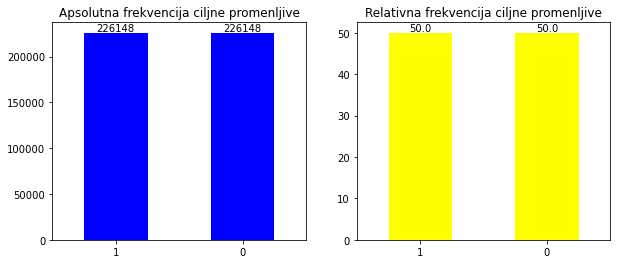

In [81]:
plot_absolute_relative_frequency(y_sm_1)

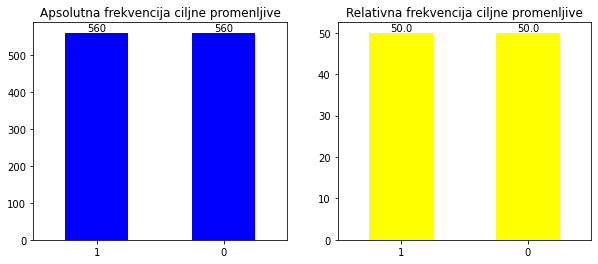

In [82]:
plot_absolute_relative_frequency(y_sm_2)